# Importing Libraries

In [204]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support
from sklearn.decomposition import TruncatedSVD

# Loading the Data

In [205]:
df_bg = pd.read_csv('../datasets/games-cleaned.csv')
df_rv = pd.read_csv('../datasets/reviews-cleaned.csv')

# Model-Based Recommenders

In [206]:
ratings_matrix = df_rv.pivot_table(index='user', columns='name', values='rating').fillna(0)
ratings_matrix.head()

name,"...and then, we held hands.",...und tschüss!,10 Days in Africa,10 Days in Asia,10 Days in Europe,10 Days in the Americas,10 Days in the USA,10 Minute Heist: The Wizard's Tower,10' to Kill,1000 Blank White Cards,...,Zooloretto Junior,Zooloretto: The Dice Game,Zoowaboo,Zug um Zug: Deutschland,Zulus on the Ramparts!: The Battle of Rorke's Drift – Second Edition,ZÈRTZ,[redacted],duck! duck! Go!,ebbes,iKNOW
user,,,,,,,,,,,,,,,,,,,,,
1 Family Meeple,0.0,0.0,0.0,0.0,4.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.5,4.0,0.0,0.0
1000rpm,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28green,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42amu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549sd,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [207]:
user_ratings_mean = np.mean(ratings_matrix, axis = 1)
user_ratings_mean

user
1 Family Meeple    0.826877
1000rpm            0.776735
28green            0.936381
42amu              0.921868
549sd              1.191510
                     ...   
zsknight           0.795275
zumba              0.842863
zumikon            1.076822
zunnesteke         0.826931
zuzusdad           0.965561
Length: 3067, dtype: float64

In [208]:
# R_min = (ratings_matrix - user_ratings_mean.values.reshape(-1, 1)).min().min()
# R_demeaned =  + ratings_matrix - user_ratings_mean.values.reshape(-1, 1) - R_min
R_demeaned = ratings_matrix - user_ratings_mean.values.reshape(-1, 1)

R_demeaned.head()

name,"...and then, we held hands.",...und tschüss!,10 Days in Africa,10 Days in Asia,10 Days in Europe,10 Days in the Americas,10 Days in the USA,10 Minute Heist: The Wizard's Tower,10' to Kill,1000 Blank White Cards,...,Zooloretto Junior,Zooloretto: The Dice Game,Zoowaboo,Zug um Zug: Deutschland,Zulus on the Ramparts!: The Battle of Rorke's Drift – Second Edition,ZÈRTZ,[redacted],duck! duck! Go!,ebbes,iKNOW
user,,,,,,,,,,,,,,,,,,,,,
1 Family Meeple,-0.826877,-0.826877,-0.826877,-0.826877,3.273123,-0.826877,-0.826877,-0.826877,-0.826877,-0.826877,...,-0.826877,-0.826877,-0.826877,-0.826877,-0.826877,-0.826877,5.673123,3.173123,-0.826877,-0.826877
1000rpm,-0.776735,-0.776735,-0.776735,-0.776735,6.223265,-0.776735,-0.776735,-0.776735,-0.776735,-0.776735,...,-0.776735,6.223265,-0.776735,-0.776735,-0.776735,-0.776735,-0.776735,-0.776735,-0.776735,-0.776735
28green,-0.936381,-0.936381,-0.936381,-0.936381,6.063619,-0.936381,6.063619,-0.936381,-0.936381,-0.936381,...,-0.936381,-0.936381,-0.936381,-0.936381,-0.936381,-0.936381,-0.936381,-0.936381,-0.936381,-0.936381
42amu,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,7.078132,-0.921868,...,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868,-0.921868
549sd,-1.191510,-1.191510,-1.191510,-1.191510,-1.191510,-1.191510,4.808490,-1.191510,-1.191510,-1.191510,...,-1.191510,-1.191510,-1.191510,-1.191510,-1.191510,-1.191510,3.808490,-1.191510,-1.191510,-1.191510


In [209]:
user_ratings = R_demeaned.T
user_ratings.head()

user,1 Family Meeple,1000rpm,28green,42amu,549sd,AHforever,AJBrandon,ASSaali,Aarkas,AaronBE85,...,zhiwiller,zizishaoye,zodball,zottirgen,zpark999,zsknight,zumba,zumikon,zunnesteke,zuzusdad
name,,,,,,,,,,,,,,,,,,,,,
"...and then, we held hands.",-0.826877,-0.776735,-0.936381,-0.921868,-1.19151,-0.78482,-0.732649,-0.616761,-0.831842,-0.835007,...,-1.11567,-2.271467,-1.303143,-0.735596,-0.847359,-0.795275,-0.842863,-1.076822,-0.826931,-0.965561
...und tschüss!,-0.826877,-0.776735,-0.936381,-0.921868,-1.19151,-0.78482,-0.732649,-0.616761,-0.831842,-0.835007,...,-1.11567,-2.271467,-1.303143,-0.735596,-0.847359,-0.795275,-0.842863,6.923178,-0.826931,-0.965561
10 Days in Africa,-0.826877,-0.776735,-0.936381,-0.921868,-1.19151,-0.78482,-0.732649,-0.616761,-0.831842,-0.835007,...,-1.11567,5.028533,-1.303143,-0.735596,-0.847359,-0.795275,3.157137,5.423178,-0.826931,-0.965561
10 Days in Asia,-0.826877,-0.776735,-0.936381,-0.921868,-1.19151,-0.78482,-0.732649,-0.616761,-0.831842,-0.835007,...,-1.11567,5.328533,-1.303143,-0.735596,-0.847359,-0.795275,-0.842863,-1.076822,-0.826931,-0.965561
10 Days in Europe,3.273123,6.223265,6.063619,-0.921868,-1.19151,-0.78482,-0.732649,-0.616761,-0.831842,-0.835007,...,-1.11567,5.328533,-1.303143,-0.735596,-0.847359,-0.795275,-0.842863,-1.076822,-0.826931,-0.965561


In [210]:
df_rv_rate = df_rv.set_index('user').copy()
df_rv_rate = df_rv_rate.groupby(['user', 'name']).mean()

all_users = list(df_rv_rate.index.get_level_values('user').unique())
df_users = df_rv_rate[df_rv_rate.index.get_level_values('user').isin(all_users)].copy()
df_users

rating
user            name                                  
1 Family Meeple 10 Days in Europe                  4.1
                12 Days                            7.0
                7 Wonders                          6.5
                A Column of Fire                   5.0
                A Feast for Odin                  10.0
...                                                ...
zuzusdad        Wreck Raiders                      9.2
                XCOM: The Board Game               8.4
                Xia: Legends of a Drift System     6.5
                Zombie Dice                        7.0
                Zooloretto                         9.9

[2018715 rows x 1 columns]

In [226]:
matrix = csr_matrix(R_demeaned.values)
svd = TruncatedSVD(n_components=10)
latent_features = svd.fit_transform(matrix)

In [227]:
df_eval = pd.DataFrame()

for user_index in range(len(all_users)):
  # dataframe of favourite games
  user = R_demeaned.index[user_index]
  df_user = df_users.loc[user]
  avg = df_user['rating'].mean()
  df_fav = df_user[df_user['rating'] >= avg]  

  # Use the latent features to recommend games to a user
  user_latent_features = latent_features[user_index, :]

  # Calculate the dot product between the user's latent features and all latent features
  similarity = latent_features.dot(user_latent_features)

  # Sort the games by similarity and recommend the most similar games
  most_similar_games = R_demeaned.columns[similarity.argsort()[::-1]].to_list()

  # top 10 similar games
  df_sim = most_similar_games[:10]
  
  # create lists to store the true and predicted labels
  true_labels = []
  pred_labels = []

  for game in df_sim:
    # if the recommendation is in the user's preferred games, it is a true positive
    if game in df_fav.index:
      true_labels.append(1)
      pred_labels.append(1)
    # if the recommendation is not in the user's preferred games, it is a false positive
    else:
      true_labels.append(0)
      pred_labels.append(1)

  # for each game in the user's preferred games, check if it was recommended
  for game,rate in df_fav.itertuples():
    if game not in df_sim:
      true_labels.append(1)
      pred_labels.append(0)

  # calculate precision and recall
  precision, recall, _, _ = precision_recall_fscore_support(y_true=true_labels, y_pred=pred_labels, average='binary')

  # dataframe evaluate
  df_eval[user] = {'precision': f'{precision:.2f}', 'recall': f'{recall:.4f}'}

df_eval = df_eval.T

print("Precision Average:",pd.to_numeric(df_eval['precision']).mean())
print("Recall Average:",pd.to_numeric(df_eval['recall']).mean())

Precision Average: 0.09752200847733943
Recall Average: 0.002790381480273883


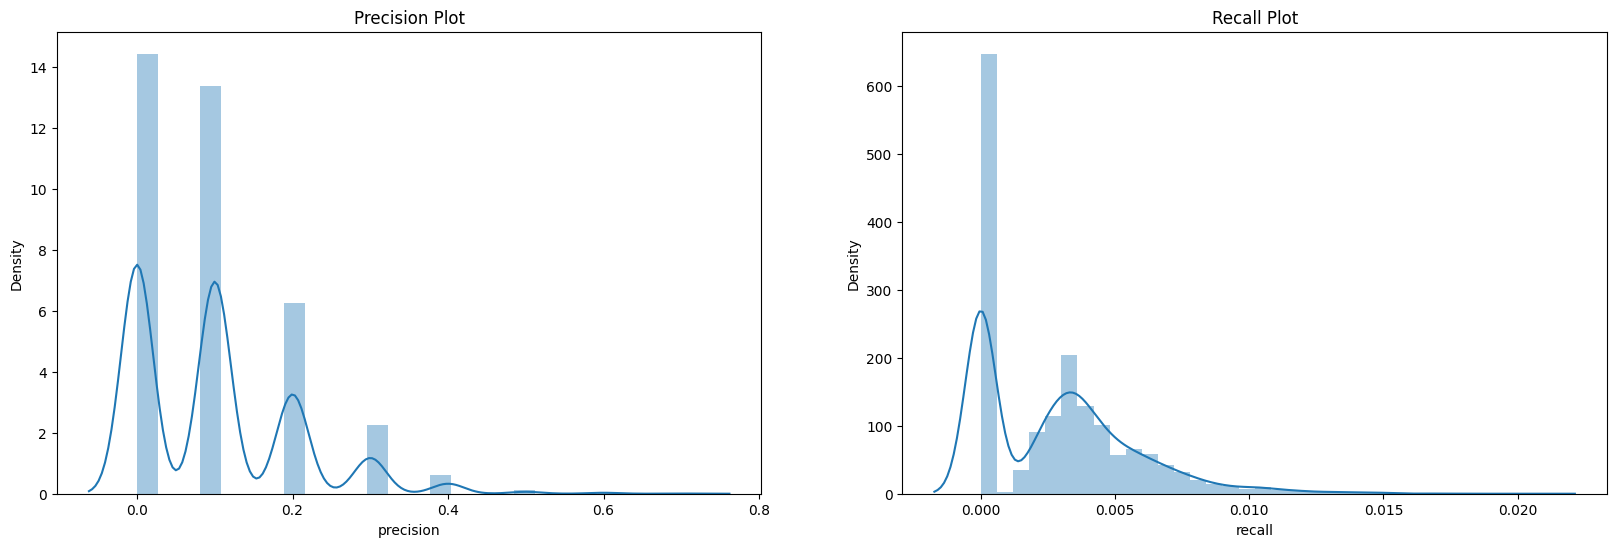

In [228]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Precision Plot")
sns.distplot(df_eval['precision'])

plt.subplot(1,2,2)
plt.title("Recall Plot")
sns.distplot(df_eval['recall'])

plt.show()